<a href="https://colab.research.google.com/github/sturu1/git-first/blob/master/Copy_of_sung_lec01_regression(1)_2020_06_11%EC%98%A4%ED%9B%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression 구현 실습(1)

> 먼저 필요한 Keras 및 numpy 라이브러리를 불러옵니다.



In [0]:
import numpy as np

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense

In [0]:
from keras.optimizers import SGD

> 실습에 사용할 데이터를 numpy 배열로 생성합니다. 
총 4개의 입력 및 출력 샘플을 정의합니다. 

> 입력데이터는 4개의 샘플(개체)로 이루어져 있으며, 각 개체는 한개의 속성을 가지고 있습니다. 출력데이터도 4개의 샘플, 1개의 속성으로 이루어져 있습니다. 

In [0]:
x_train = np.array([[1],[2],[3],[4]])

In [0]:
y_train = np.array([[0],[-1],[-2],[-3]])

In [14]:
x_train.shape

(4, 1)

> 이러한 입력, 출력데이터간의 관계를 가장 잘 설명하는 규칙을 찾는 것이 문제입니다. simple linear regression에서는 입력과 출력 데이터 간의 관계를 선형으로 가정합니다. 즉, 다음의 방정식을 만족시키는 w1과 b 값을 찾는 것이 학습이라고 할 수 있습니다. 
``` 
y = w1*x1 + b
```
프로그래밍을 통해 학습하기 전에, 먼저 여러분들이 예측해 보세요. w1과 b 값은 얼마이겠습니까? 

각 입력 및 출력 데이터의 차원과 shape를 확인합니다. 

In [15]:
x_train.shape, y_train.shape

((4, 1), (4, 1))

> 이제 Keras를 이용하여 **w1**과**b** 값을 찾는 학습을 진행해 보겠습니다. 먼저 여러분은 **모델을 생성**해야 합니다. 모델을 생성한다는 것은 마치 학습을 위한 뇌의 구조를 만드는 작업에 비유할 수 있습니다. 즉, 네트워크의 구조(뇌의 뉴런의 구조), 학습을 위해 필요한 손실함수 및 optimzer 설정(Gradient Descent Algorithm)등을 정의하는 것입니다. 

> 복잡한 모델을 만들면 보다 복잡한 문제를 학습할 수 있지만 학습에 오랜 시간이 걸리고, 단순한 모델을 만들면 단순한 문제만 학습할 수 있지만 학습에 걸리는 시간이 짧아집니다. 마치, 특정 문제를 해결하는데 인간의 뇌를 사용할지, 강아지의 뇌를 사용할지, 곤충의 뇌를 사용할지를 정하는 것에 비유할 수 있습니다. 

> 이번 예제에서는 **Keras의 Sequential() 클래스**를 이용하여 네트워크의 구조를 정의합니다. 이 예제에서는 1개의 layer(층)과 하나의 셀(unit)만을 가진 매우 단순한 구조로 network를 정의하였습니다. 사실 신경망이라고 볼수도 없습니다. 

> 본 예제는 regression 기법을 구현하는 것으로, activation 함수를 선택하지 않았습니다. 이는 활성함수 입력 전 후로 아무런 변화가 없음을 의미합니다. 결론적으로 Dense 층이 의미하는 것은 다음과 같은 수식입니다. 
```
y=w1 * x1 + b
```

In [0]:
model = Sequential() #뇌의 공간을 만들었다고생각하면됨

> 먼저 keras의 **sequentiao() 클래스**를 이용하여** model 이라는 instance를 생성**하고 여기에 **layer(층)와 unit(셀, 뉴런)을 순차적으로 추가**합니다. 이때, 입력데이터의 각 개체의 모양을 input_shape로 정의하는 것이 필요합니다. input 데이터는 4개의 개체(4명의 학생)로 이루어져 있지만, 한 개체는 1개의 속성을 가지고 있으므로 **inpu_shape는 1D 벡터인 (1,)**로 지정합니다. 또는 input_dim=1 로 표현하기도 합니다. 

In [0]:
model.add(Dense(units=1, input_shape=(1,)))  #한 개체에 몇개의 속성이 잇냐 그게 중요하다

> 윗 식은 다음과 같이 표현 가능합니다. `model.add(Dense(1, input_dim=1))`

> Dense 함수에서 activation 함수를 별도로 정의하지 않을 경우, 각 unit의 역할은 다음처럼 단순 선형 변환입니다. `outputput = dot(W,input)+b`

> 다음으로 **모델을 compile** 합니다. 이때 활용할 **손실함수**(loss function or cost function) 및 Gradient Descent 알고리즘(**optimizer**)을 정의합니다. 
본 예제는 **숫자를 예측하는 회귀분석 문제**이므로, **손실함수로 mse**(평균제곱오차)를 사용하고,**optimizer로 SGD**를 사용합니다. lr=0.1은 학습률을 정의한 것으로, 모델에 포함된 가중치가 변화하는 정도를 의미합니다. 참고로 SGD는 Gradient Descent Algorithm 중 하나로 확률적경사하강법을 의미합니다. 

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.1))

> 자 이제 모델의 생성이 끝났습니다. 
최종 학습 이전에 모델의 구조를 확인해 볼까요? 

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


> 이제 입력 및 출력 샘플을 가지고 모델을 학습 시킵니다. 
> 한번에 학습되지 않겠지요? 총 200번 반복하면서 점점 학습의 정확도를 높입니다. 여기서 모든 입력데이터를 전부 사용하여 학습하는 것을 **1 epoch** 학습하였다고 표현합니다. 우리는 200번을 학습시킬 계획이므로 **epochs=200**으로 설정합니다. 학습이 진행되는 동안 model instance의 가중치는 계속 변화면서 타겟값과 예측값의 차이를 줄여가게 됩니다. 그리고 학습과정동안의 각종 지표들은 history라는 변수에 저장되게 됩니다. 

In [28]:
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 46ms/step - loss: 22.1725
Epoch 2/200
4/4 [==============================] - 0s 883us/step - loss: 10.1449
Epoch 3/200
4/4 [==============================] - 0s 703us/step - loss: 4.7336
Epoch 4/200
4/4 [==============================] - 0s 597us/step - loss: 2.2934
Epoch 5/200
4/4 [==============================] - 0s 241us/step - loss: 1.1879
Epoch 6/200
4/4 [==============================] - 0s 462us/step - loss: 0.6823
Epoch 7/200
4/4 [==============================] - 0s 267us/step - loss: 0.4464
Epoch 8/200
4/4 [==============================] - 0s 258us/step - loss: 0.3323
Epoch 9/200
4/4 [==============================] - 0s 890us/step - loss: 0.2733
Epoch 10/200
4/4 [==============================] - 0s 237us/step - loss: 0.2395
Epoch 11/200
4/4 [==============================] - 0s 567us/step - loss: 0.2174
Epoch 12/200
4/4 [==============================] - 0s 442us/step - loss: 0.2010
Epoch 13/200
4/4 [==================

> 학습이 진행되는 동안 학습 결과와 실제 출력값의 차리를 나타내는 loss 값이 점차 줄고 있는 것을 확인할 수 있습니다. 학습이 잘 진행되고 있다는 의미겠지요. 

> 그럼, 모델의 학습결과, 즉 모델의 가중치를 확인해 볼까요? 
w값은 거의 -1, b 값은 거의 1이 나오는 것을 알 수 있지요? 

In [29]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.99881613]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.99651915], dtype=float32)>]

> 학습이 진행되는 동안(epoch) 손실값(실제값과 학습값과의 차이)의 변화를 확인해 보겠습니다. 그래프를 그리는 도구인 matplotlib 모듈을 사용하겠습니다. 

> 학습이 진행되는 동안 손실값은 history.history라는 변수에 dictionary 형태로 저장되어 있습니다. 따라서 여러분은 다음과 같이 100번의 반복동안 손실함수의 값(mse)을 확인할 수 있습니다. 

In [0]:
import matplotlib.pyplot as plt

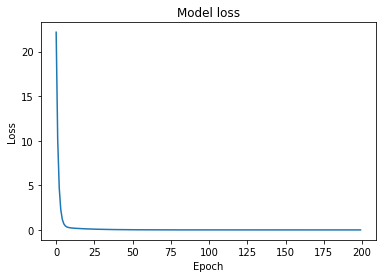

In [38]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

> 학습이 끝났으니, 이번에는 새로운 데이터(샘플)에 대한 모델의 예측값을 확인해 볼까요? 
만일 입력데이터 5라는 새로운 샘플이 주어졌을때, 출력은 어떻게 될까요? 

